<a href="https://colab.research.google.com/github/CaioLSouza/my_portfolio_en/blob/main/Insurance_Premium_Prediction_with_Auto_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT -- Regression with Auto Machine Learning

Insurance companies have the basic function of protecting their customers in any problematic situation. For example, health insurance companies cover their customers' hospital expenses in times of demand. To do so, they finance themselves through recurring payments from these customers.

However, not all customers are the same, that is, each customer has a greater or lesser propensity to use the services offered by insurance. Using the healthcare company example again, elderly clients tend to be more tolerant of using healthcare services than younger clients. Because of this, companies tend to charge different insurance premiums for customers who are more or less tolerant of using their services. Customers with higher **risks** tend to have a higher insurance premium.

In this project, we are going to use this concept to try to estimate the insurance premium value of a health company based on information from its clients, such as age, sex, BMI, among others. For this, we will use regression techniques, more specifically with recent machine learning methods, called "AutoML", which allow greater speed and agility in the construction of models and algorithms.

## Importing Libraries

In [3]:
# data manipulation
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from pycaret.regression import *

In [4]:
# setting a font
plt.rcParams['font.family'] = 'Arial'

# setting the colors
AZUL = '#003F5c'
CINZA = '#9E9E9E'
CINZA_TEXTO = '#515151'

## Data Gathering

The dataset used has information on customers of US health insurance companies and can be found at this [link](https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset). It has 1338 lines and 7 variables. 

Each row corresponds to a person and each column to information about that person.

In [5]:
health = pd.read_csv('https://raw.githubusercontent.com/CaioLSouza/datasets/main/health.csv')
health.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Dictionary of variables

The variables present in this data set are:

* ``age``: Age.

* ``sex``: Sex.

* ``bmi``: Body Mass Index (BMI).

* ``children``: number of children of the person.

* ``smoker``: If the person is a smoker or not.

* ``region``: What is the region of the person.

* ``charges``: Cost of the person's insurance premium.


For a regression, the variable we are trying to predict is ``charges``.

## Functions used in this project

In [6]:
def scatter(data, x, y, hue=None):
  '''create a scatter plot'''
  fig, ax = plt.subplots(figsize=(10, 8))
  sns.set_palette([AZUL, CINZA])
  sns.scatterplot(data=data, x=x, y=y, hue=hue)
  ax.set_title(f'Scatter plot: {x} and {y}', fontsize=22, color=CINZA_TEXTO, weight='bold')
  plt.tight_layout()

In [7]:
def get_type(data):
  '''split the variables of a dataset between categorical and numerical variables'''
  num_var = []
  cat_var = []
  for col in data.columns:
     if data[col].dtype == float or data[col].dtype == int:
       num_var.append(col)
     else:
       cat_var.append(col)
  return num_var, cat_var

In [8]:
def group_by(data, col, group):
  '''build a bar plot'''
  df = data.groupby(group)[col].mean().to_frame
  fig, ax = plt.subplots(figsize=(10, 8))
  sns.barplot(data=health, x=group, y=col, ax=ax, errwidth=0)
  ax.set_title(f'Bar plot: {col} and {group}', color=CINZA_TEXTO, fontsize=22, weight='bold')
  plt.tight_layout()
  return df

In [9]:
def get_model(model_name):
  '''fit a model already with hiperparameters tuning'''
  model = create_model(model_name)
  tuned_model = tune_model(model)
  return tuned_model

## Exploratory Data Analysis

Given our problem and the data, we can start the analysis with a data exploration.

### Dimensionality

In [10]:
print(f"Number of rows: {health.shape[0]}")
print(f"Number of columns: {health.shape[1]}")

Number of rows: 1338
Number of columns: 7


### Missing and Duplicated Values

Não temos nenhum valor ausente no conjunto de dados e apenas um valor duplicado. Vamos removê-lo.

We don't have any missing value in the dataset. However, we have a duplicated value. Let's remove it.

In [11]:
# null values
health.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
# duplicated values
health.loc[health.duplicated() == True]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [13]:
health = health.drop_duplicates()

### Data Type of the Features

As we can see:

* There are 4 numerical features, including the target feature ``charges``.

* And there are 3 categorical features. ``sex`` and ``smoker`` are binary features, while ``region`` isn't.

In [14]:
health.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


## Features


Agora, iremos fazer um estudo das variáveis, começando com uma visualização sobre suas distribuições

Now, we will do a study about the features, starting with a visualization of their distributions.

### Frequency Distribution

* For numerical features, let's use a histogram for the visualization.

* As for the categorical features, we will use a ``countplot``.

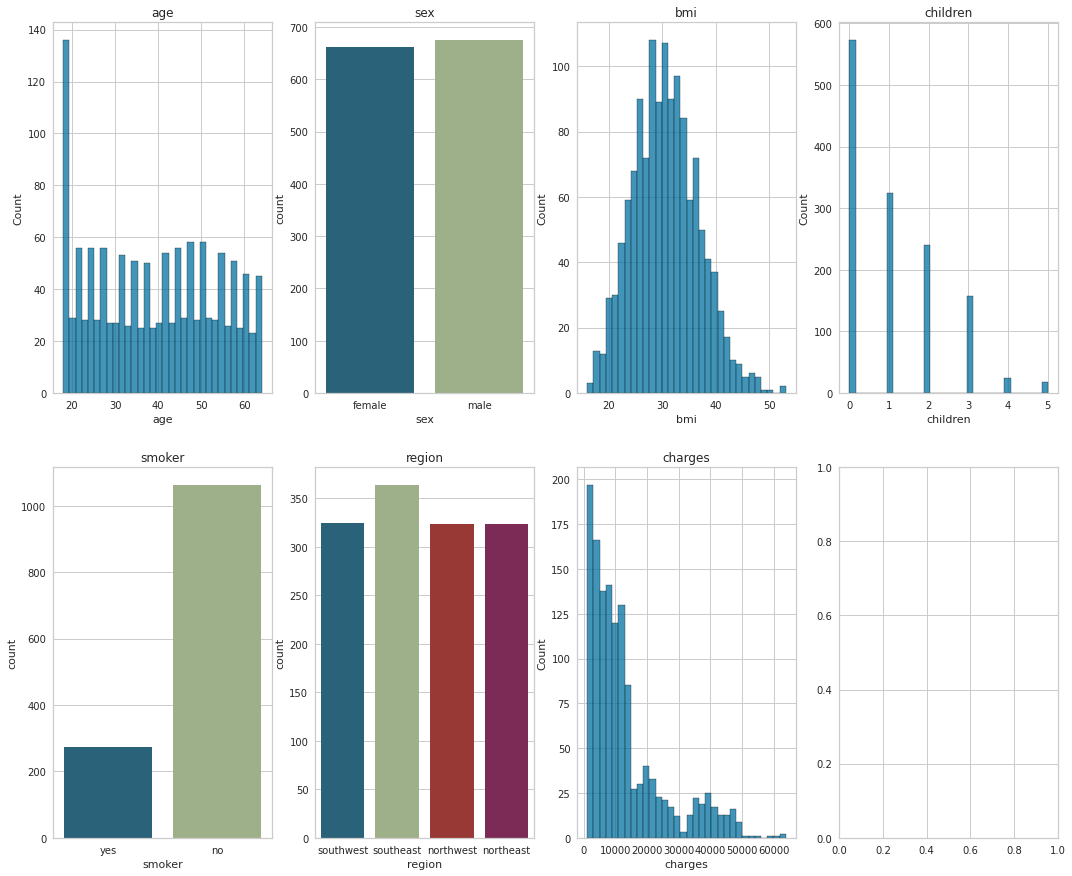

In [15]:
sns.set_style()
fig, ax = plt.subplots(figsize=(18, 15), nrows=2, ncols=4)

idx=0
num_var, cat_var = get_type(health)

for col in health.columns:
  idx+=1
  plt.subplot(2, 4, idx)
  if col in num_var:
    sns.histplot(data=health, x=col, bins=32)
    plt.title(col, fontsize=12)
  else:
    sns.countplot(data=health, x=col, saturation=0.5)
    plt.title(col, fontsize=12)

The distributions allow us to draw some interesting conclusions.

* Age has a very constant distribution, except for smaller age values.

* There is a slightly higher number of men compared to women.

* BMI has an approximately normal distribution.

* Most customers do not have children and the amount is decreasing until reaching 5 children. Although it is a numerical variable, it is a discrete variable. Therefore, one option would be to transform it into a categorical variable and group rare values ​​(such as 4 and 5 children), which can help to reduce the "noise" of the model that will be created.

* Most customers are non-smokers.

* The regions are approximately equally distributed. The southeast region has a slightly higher prevalence.

* Insurance premiums have a distribution with a high prevalence of the lowest values ​​and a decreasing trend towards the highest values. Note that it is not normally distributed, but is stretched to the right. This can be handled using a variable transformation

#### Statistical summary

We can use summary statistics to take a closer look at the general descriptive characteristics of numerical variables.

In [16]:
health.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


* Age: the average age of the clients is 39 years old. The minimum amount is 18 years old, that is, only adults can have their own health insurance. The maximum age is 64 years.

* The average BMI is 30, which characterizes obesity. Slightly less than 25% of customers are at or below normal weight. So a little over 75% of customers are overweight or worse. Around 25% of the most obese clients are severely or morbidly obese.

* Customers have, on average, one child.

* The average insurance premium is close to 13200. The median is 9300.

Now, let's look at the distribution of categorical variables more closely.

In [17]:
print(health['smoker'].value_counts() / len(health))
print(health['region'].value_counts() / len(health))
print(health['sex'].value_counts() / len(health))

no     0.795064
yes    0.204936
Name: smoker, dtype: float64
southeast    0.272251
southwest    0.243082
northwest    0.242334
northeast    0.242334
Name: region, dtype: float64
male      0.504862
female    0.495138
Name: sex, dtype: float64


This confirms what we saw in the hstogram.

### Answering some Questions

#### Do older people tend to have a higher BMI?

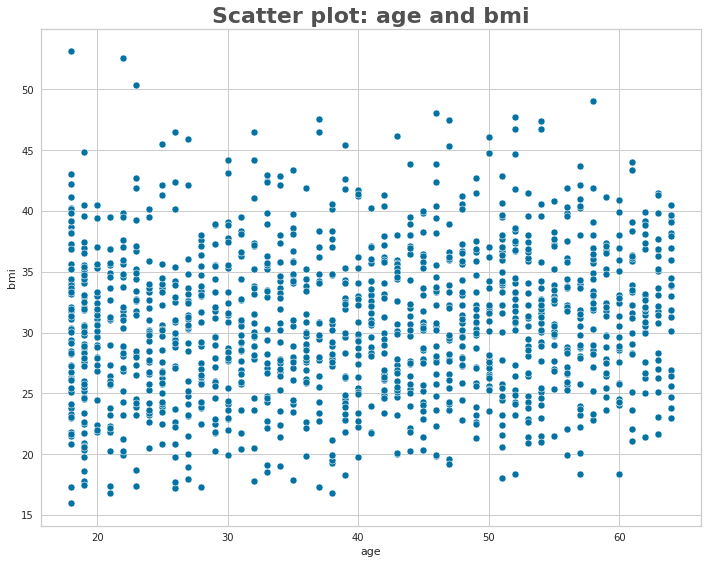

In [18]:
scatter(data=health, x='age', y='bmi')

A brief look at the plot does not seem to indicate any significant relationship between age and BMI.

#### What is the average BMI by sex?

In [19]:
health.groupby('sex').bmi.mean()

sex
female    30.377749
male      30.943652
Name: bmi, dtype: float64

The BMI for each sex is almost identical.


#### Age of smokers and non-smokers

In [20]:
health.groupby('smoker').age.mean()

smoker
no     39.404516
yes    38.514599
Name: age, dtype: float64

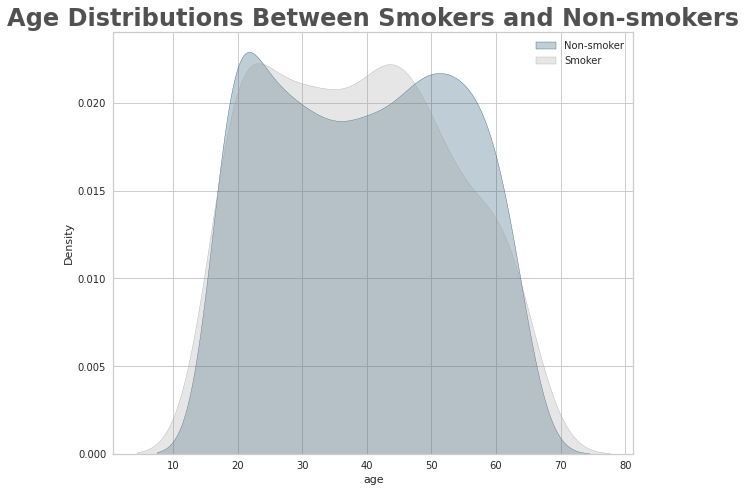

In [21]:
smoker = health[health.smoker == 'yes']
not_smoker = health[health.smoker == 'no']

fig, ax = plt.subplots(figsize=(10,7))

sns.kdeplot(not_smoker['age'], label="Non-smoker", shade=True)
sns.kdeplot(smoker['age'], label='Smoker', shade=True)

ax.set_title('Age Distributions Between Smokers and Non-smokers', fontsize=24, weight='bold', color=CINZA_TEXTO)
ax.legend()

plt.tight_layout()

The average age of smokers and non-smokers is very similar, as well its distribution. The distributions indicates only a small prevalence of smokers between 30 and 45 years and of non-smokers between 50 and 60 years.

#### Is there a relationship between age and insurance premium?

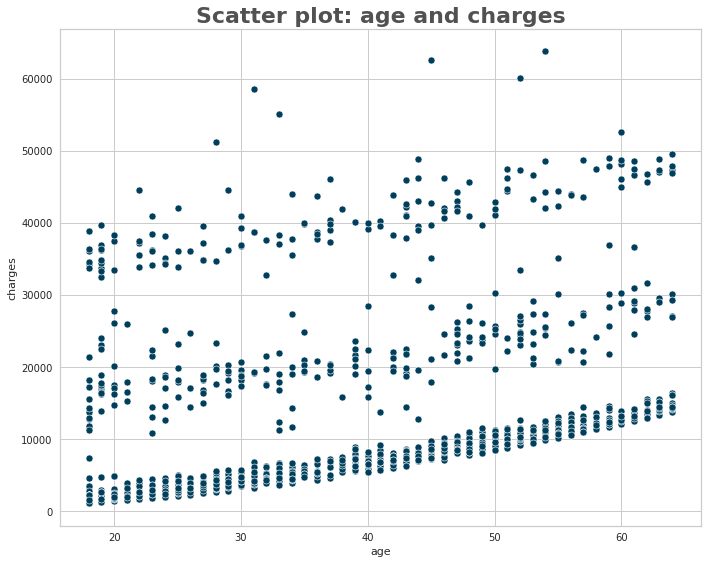

In [22]:
scatter(data=health, x='age', y='charges')

As you can see, there is a very strong relationship between these two variables. The presence of three sets of grouped points that form growing "lines" is also clear. The one at the bottom is the one that stands out the most for its great linearity.

What explains this division? Perhaps there is another variable in the dataset -- probably categorical -- that explains this phenomenon.

So, let's study a little the relationship between the ``charges`` variable and other variables in the dataset.

#### ``charges`` and ``region``

<bound method Series.to_frame of region
northeast    13406.384516
northwest    12450.840844
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64>

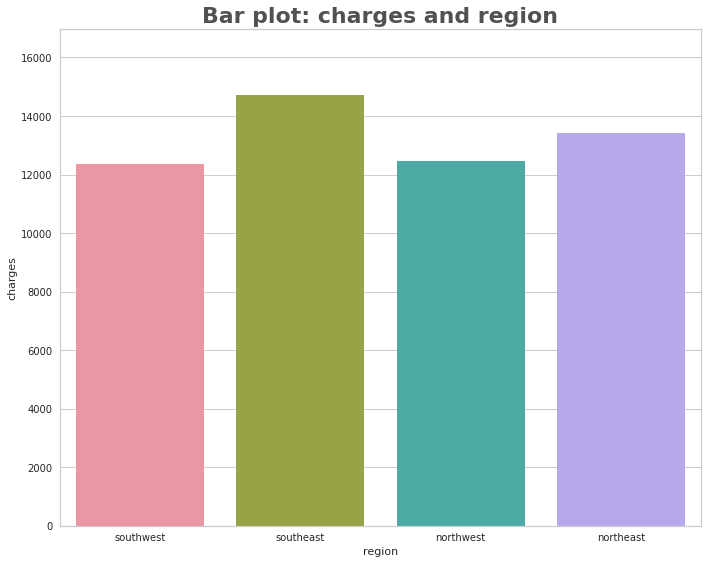

In [23]:
group_by(health, 'charges', 'region')

Customers from the Southeast tend to have a higher value for ``charges``, followed by Customers from the Northeast.


### ``charges`` and ``children``

<bound method Series.to_frame of children
0    12384.695344
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64>

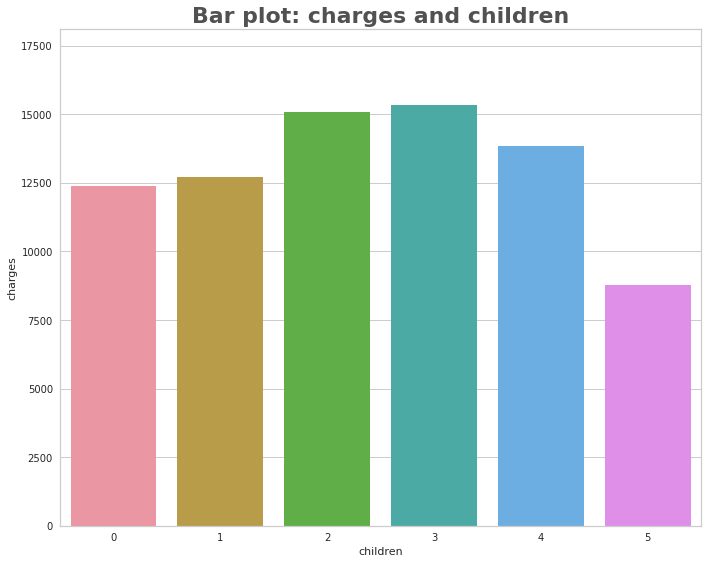

In [24]:
group_by(health, 'charges', 'children')

#### ``charges`` and `smoker``

<bound method Series.to_frame of smoker
no      8440.660307
yes    32050.231832
Name: charges, dtype: float64>

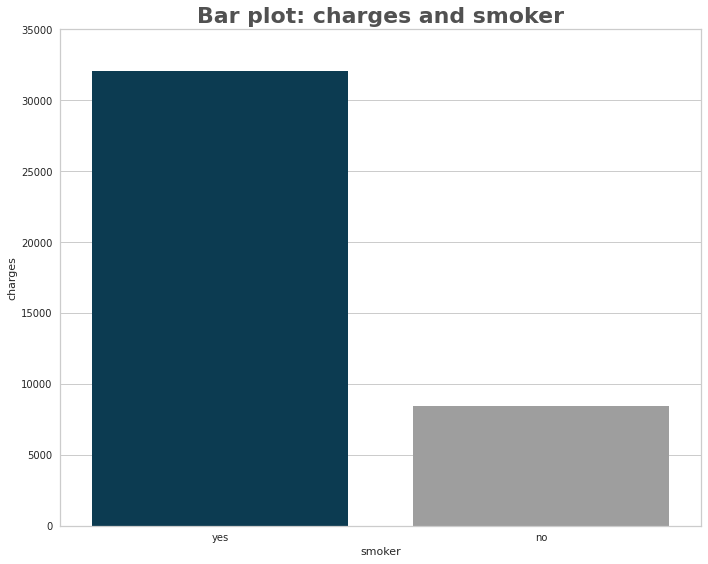

In [25]:
group_by(health, 'charges', 'smoker')

The difference between smokers and non-smokers is huge! Smokers have an insurance premium nearly 4 times higher on average. Let's see if this is the variable that is creating the phenomenon observed in the scatterplot.

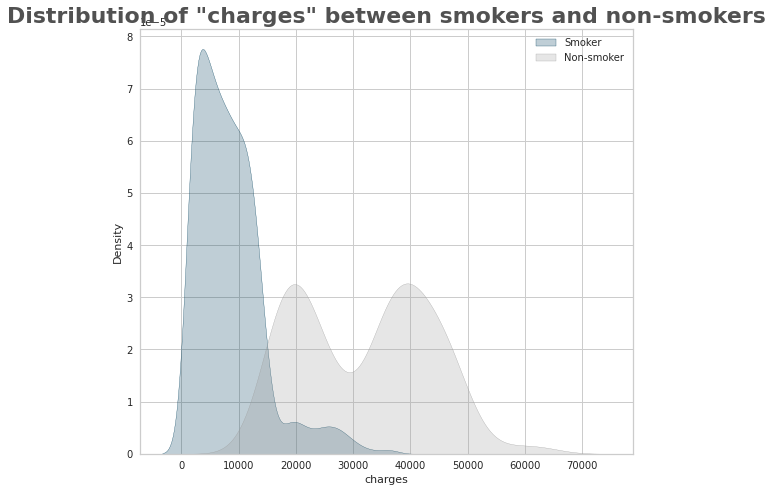

In [26]:
smoker = health[health.smoker == 'yes']
not_smoker = health[health.smoker == 'no']

fig, ax = plt.subplots(figsize=(10,7))

sns.kdeplot(not_smoker['charges'], label="Smoker", shade=True)
sns.kdeplot(smoker['charges'], label='Non-smoker', shade=True)

ax.set_title('Distribution of "charges" between smokers and non-smokers', fontsize=22, weight='bold', color=CINZA_TEXTO)
ax.legend()

plt.tight_layout()

The distribution reinforces this difference between smokers and non-smokers.


### Age and insurance premium divided by smokers and non-smokers

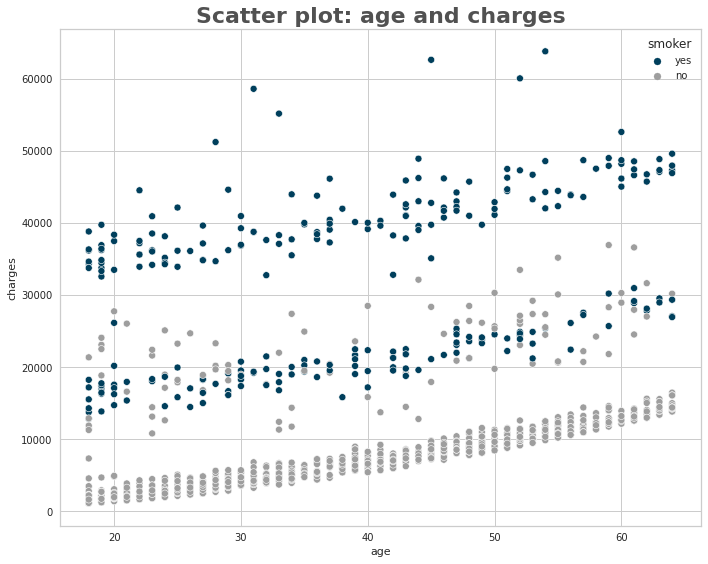

In [27]:
scatter(data=health, x='age', y='charges', hue='smoker')

In fact, the difference between smokers and non-smokers becomes very evident in the graph. Non-smokers are concentrated at the bottom, while smokers naturally have a higher insurance premium.

Except for a few observations, the relationship between age and non-smoking insurance premium is almost completely linear.

Therefore, we were able to conclude that:

* Smoking or not is the most determining characteristic in the value of the insurance premium.

* The relationship between age and premium value is also large, and becomes especially linear for non-smokers.


#### Relationship between BMI (``bmi``) and Insurance Premium (``charges``)

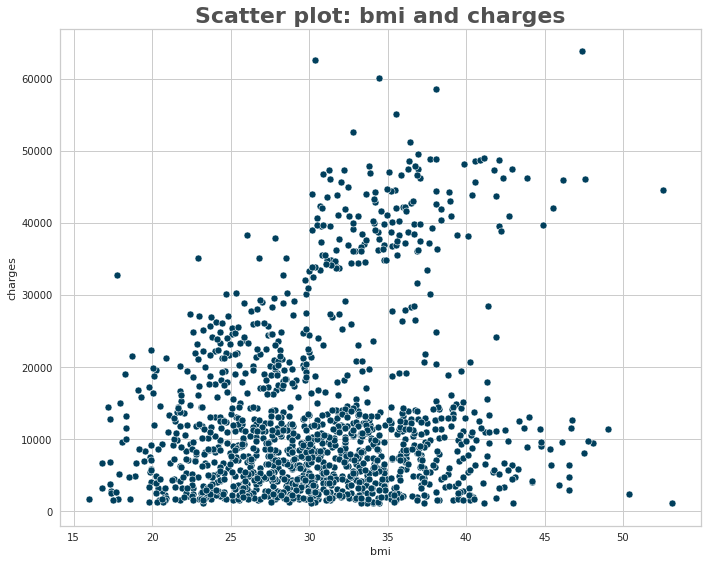

In [28]:
scatter(data=health, x='bmi', y='charges')

We can also see a positive correlation, although not as strong as the previous one.

Furthermore, we can also notice that a part of the data seems to follow a more noticeable linear relationship, while another part seems to group horizontally in the graph.

Again, this can be explained by the case of smokers and non-smokers.

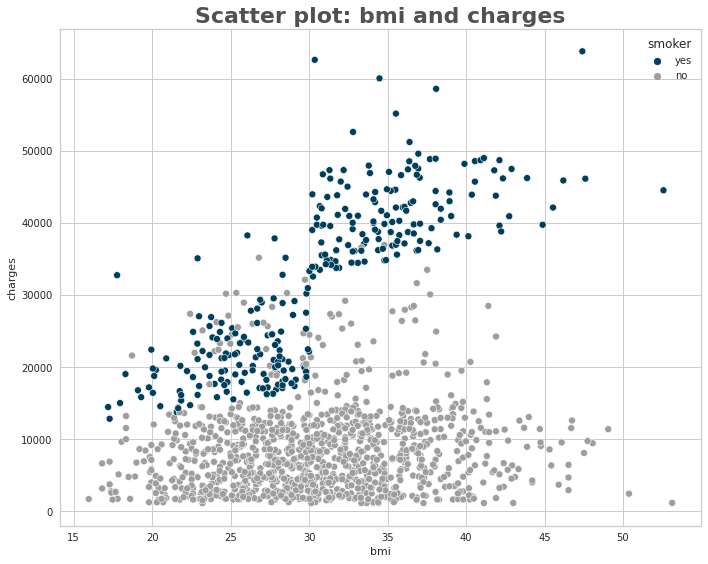

In [29]:
scatter(data=health, x='bmi', y='charges', hue='smoker')

* Non-smokers cluster more horizontally and do not show a positive correlation evident from the graph.

* On the contrary, for non-smokers, the relationship between BMI and insurance premium is much more intense.


### Correlations

We can now visualize the correlations between the variables.

In [30]:
corr = health.corr()

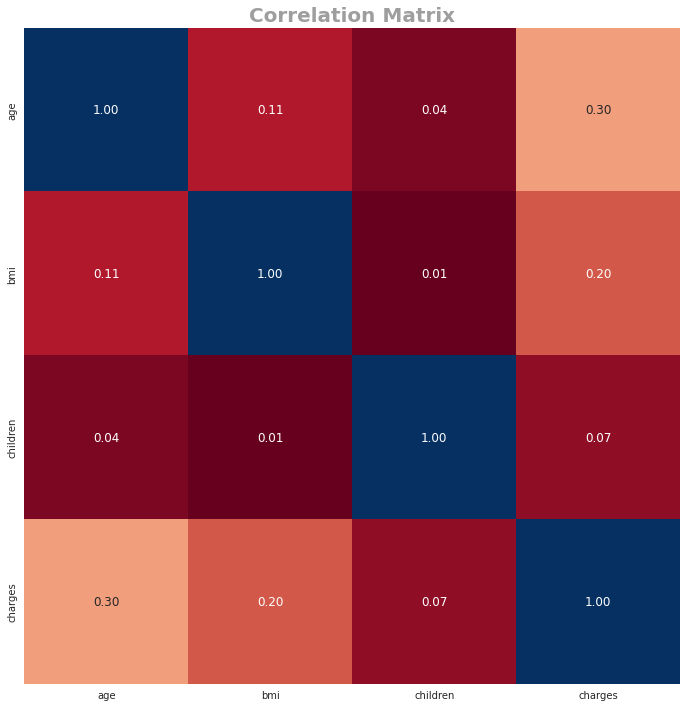

In [31]:
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title("Correlation Matrix", fontsize=20, color=CINZA, weight='bold')
sns.heatmap(corr, cmap = 'RdBu', fmt = '.2f', square = True , linecolor = 'white', annot = True, cbar=False)
plt.tight_layout()

* The biggest correlation is between ``age`` and ``charges``, as we had already visualized in the scatterplot. Its value is 0.3.

* The correlation between ``charges`` and ``bmi`` is 0.2, indicating what we also see in the scatterplot.

Now, let's see how these correlations behave when we discriminate between smokers and non-smokers.

In [32]:
no_smoke = health[health['smoker'] == 'no']
smoke = health[health['smoker'] == 'yes']

In [33]:
print("Correlation Matrix for Smokers")
smoke.corr()

Correlation Matrix for Smokers


,age,bmi,children,charges
age,1.000000,0.059674,0.081183,0.368224
bmi,0.059674,1.000000,-0.012619,0.806481
children,0.081183,-0.012619,1.000000,0.035945
charges,0.368224,0.806481,0.035945,1.000000


In [34]:
print("Correlation Matrix for non-smokers")
no_smoke.corr()

Correlation Matrix for non-smokers


,age,bmi,children,charges
age,1.000000,0.122745,0.032219,0.627400
bmi,0.122745,1.000000,0.019207,0.084077
children,0.032219,0.019207,1.000000,0.138109
charges,0.627400,0.084077,0.138109,1.000000


As expected, the correlations become much more evident when we do this:

* For smokers, the correlation between ``charges`` and ``age`` increases from 0.3 to 0.36.

* For smokers, the correlation between ``charges`` and ``bmi`` increases from 0.2 to 0.80.

* In non-smokers, the correlation between ``charges`` and ``age`` was 0.62


### Training-test split

First of all, let's first leave a separate test suite so that it is not used during training.

In [35]:
train = health.sample(frac=0.9)
test = health.drop(train.index)

test.reset_index(inplace=True, drop=True)
train.reset_index(inplace=True, drop=True)

In [36]:
print(train.shape, test.shape)

(1203, 7) (134, 7)


### Setting the environment

Now, we will start by setting up all the necessary preprocessing steps to be done. In general, code below accomplishes the following:

* The target variable of the problem is ``charges``, that is, the value of the insurance premium.

* Data normalization. Important for models that deal with distance, such as K-Nearest Neighbors and a Support Vector Machine.

* Groups the values ​​of the ``children`` variable.

In [37]:
reg = setup(data=train, target='charges', session_id=12 ,
            normalize=True, 
            log_experiment=True, experiment_name='health.01', 
            numeric_features = ['children'], bin_numeric_features=['children'])

,Description,Value
0,session_id,12
1,Target,charges
2,Original Data,"(1203, 7)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(842, 14)"


INFO:logs:Logging experiment in MLFlow
2023/01/23 00:38:04 INFO mlflow.tracking.fluent: Experiment with name 'health.01' does not exist. Creating a new experiment.
INFO:logs:SubProcess save_model() called ==================================
INFO:logs:Initializing save_model()
INFO:logs:save_model(model=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=['children'],
                                      target='charges', time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeri...
                ('binn

### Comparing models

With the pre-processing done, we will now train the data on several simple models and observe the ones with the best results.

To evaluate them, the main metric to be taken into account will be the $R^2$.

In [38]:
best = compare_models(cross_validation=True, n_select=3, fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2553.4428,2.145743e+07,4619.9362,0.8467,0.4422,0.2999,0.106
lightgbm,Light Gradient Boosting Machine,2875.5835,2.359692e+07,4844.4019,0.8314,0.5374,0.3686,0.198
rf,Random Forest Regressor,2774.0861,2.436493e+07,4923.3959,0.8260,0.4802,0.3367,0.620
ada,AdaBoost Regressor,4041.5470,2.595862e+07,5090.0651,0.8145,0.6206,0.7110,0.026
et,Extra Trees Regressor,2795.5551,2.706770e+07,5192.8090,0.8066,0.4959,0.3309,0.348
llar,Lasso Least Angle Regression,4038.6981,3.540466e+07,5947.8141,0.7477,0.5857,0.4051,0.016
ridge,Ridge Regression,4062.8402,3.542648e+07,5949.7866,0.7475,0.5826,0.4087,0.028
lasso,Lasso Regression,4047.1957,3.544666e+07,5951.2899,0.7474,0.5740,0.4059,0.016
br,Bayesian Ridge,4058.2923,3.543721e+07,5950.6211,0.7474,0.6238,0.4078,0.036
lr,Linear Regression,4049.0035,3.546224e+07,5952.5766,0.7473,0.5708,0.4061,0.976


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:[GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=12, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_

The models that performed best were:

* Gradient Boosting

* Random Forest

* Light Gradient Boosting

All these models have in common the fact that they are models based on decision trees and are *ensembles*. In other words, they are formed by combining multiple decision trees.

In this project, we will choose these three best algorithms and we will choose the one that has the best performance after *tuning* the hyperparameters.

### Gradient Boosting Regressor

First, let's fit the **Gradient Boosting Regressor**

In [39]:
tuned_gbr = get_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2967.2923,2.497004e+07,4997.0027,0.8207,0.5724,0.4816
1,2527.3633,2.169673e+07,4657.9745,0.8423,0.5193,0.3309
2,2730.1498,2.675949e+07,5172.9572,0.8047,0.4334,0.2571
3,2239.1600,1.342502e+07,3664.0174,0.8928,0.4894,0.3148
4,2563.7138,2.255619e+07,4749.3359,0.8840,0.4183,0.2181
5,3138.0485,3.077733e+07,5547.7316,0.7567,0.6521,0.3229
6,2829.7269,2.423487e+07,4922.8922,0.8116,0.5540,0.4742
7,3368.5735,3.167297e+07,5627.8745,0.7408,0.5007,0.3672
8,2899.7258,2.506874e+07,5006.8697,0.8329,0.4100,0.2783


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 4
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=7,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.001, min_impurity_split=None,
                          min_samples_leaf=4, min_samples_split=9,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=12, subsample=0.75, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [40]:
print(tuned_gbr)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=7,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.001, min_impurity_split=None,
                          min_samples_leaf=4, min_samples_split=9,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=12, subsample=0.75, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


### Evaluating the model

Once the model is created, we can see how to visualize its performance and general characteristics with some graphs.

#### Predictions and errors

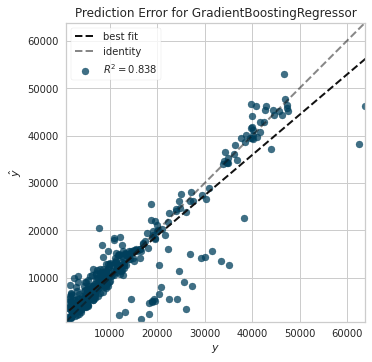

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [41]:
plot_model(tuned_gbr, plot='error')

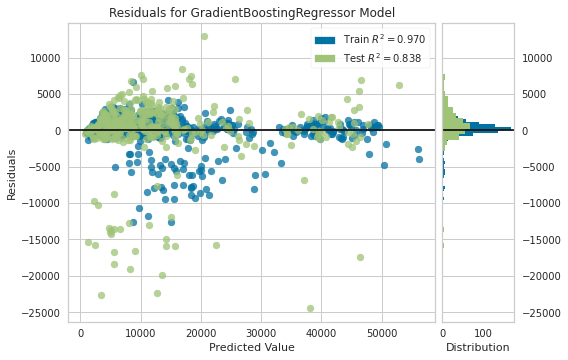

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [42]:
plot_model(tuned_gbr, plot='residuals')

#### Feature Importance

As expected, the most relevant features are:

* Whether or not the customer is a smoker

* The client's age

* The client's BMI

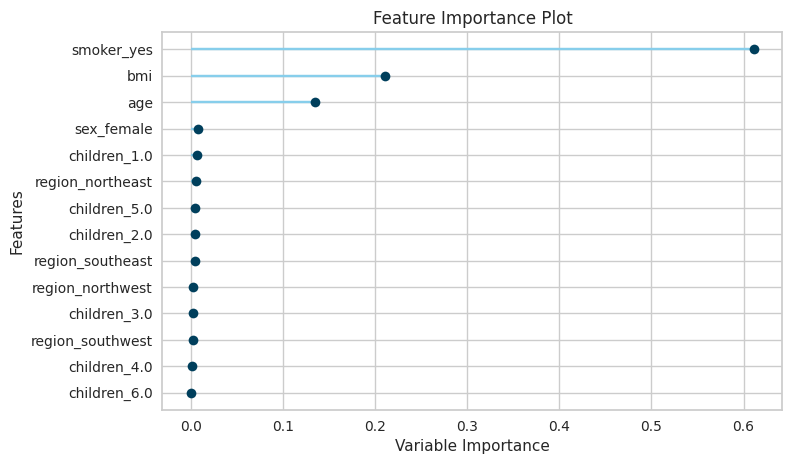

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [43]:
plot_model(tuned_gbr, plot='feature_all')

#### General View

In [44]:
evaluate_model(tuned_gbr)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=7,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.001, min_impurity_split=None,
                          min_samples_leaf=4, min_samples_split=9,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=12, subsample=0.75, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Random Forest

Let's apply the same approach to the Random Forest alghoritm.

In [45]:
tuned_rf = get_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2570.0539,2.060033e+07,4538.7588,0.8520,0.4920,0.4049
1,2386.3385,1.810492e+07,4254.9874,0.8684,0.4573,0.3240
2,2777.6606,2.568932e+07,5068.4628,0.8125,0.4021,0.2769
3,2002.4878,1.045032e+07,3232.6949,0.9166,0.4034,0.2927
4,2439.6471,2.156104e+07,4643.3864,0.8891,0.3923,0.2323
5,2702.6966,2.526783e+07,5026.7114,0.8003,0.5026,0.2958
6,2608.1314,2.263346e+07,4757.4636,0.8241,0.5199,0.3772
7,3118.3892,2.906061e+07,5390.7897,0.7622,0.4514,0.3106
8,2675.9996,2.173218e+07,4661.7787,0.8552,0.3807,0.2615


INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 6
INFO:logs:RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0002,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=140, n_jobs=-1, oob_score=False,
                      random_state=12, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


### Evaluating Random Forest

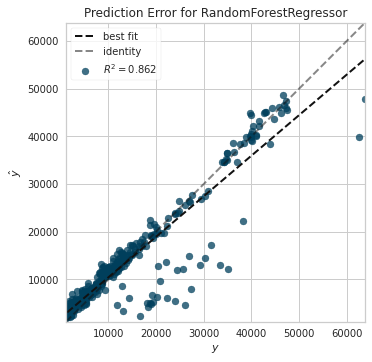

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [46]:
plot_model(tuned_rf, plot='error')

#### Random Forest -- Residuals

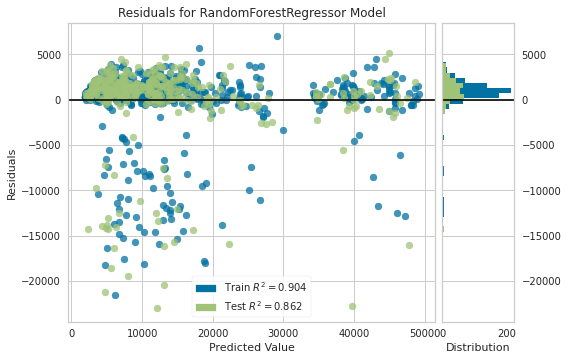

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [47]:
plot_model(tuned_rf, plot='residuals')

#### Random Forest -- Feature Importance

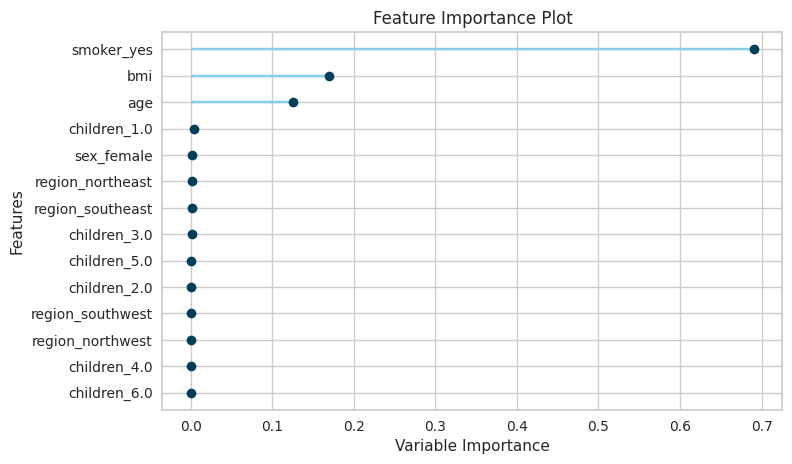

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [48]:
plot_model(tuned_rf, plot='feature_all')

#### Random Forest -- General View

In [49]:
evaluate_model(tuned_rf)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0002,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=140, n_jobs=-1, oob_score=False,
                      random_state=12, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### LightGBM

Again, let's apply the procedure for ***Light Gradient Boosting***

In [50]:
tuned_lgbm = get_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2875.7826,2.303079e+07,4799.0405,0.8346,0.4824,0.3944
1,2453.1661,1.808907e+07,4253.1244,0.8685,0.4589,0.2991
2,2874.8480,2.586639e+07,5085.9013,0.8112,0.4400,0.3011
3,2221.0514,1.244723e+07,3528.0631,0.9006,0.3852,0.2666
4,2870.4971,2.336494e+07,4833.7290,0.8798,0.3959,0.2381
5,3043.3230,2.860145e+07,5348.0323,0.7739,0.6442,0.3386
6,2850.9786,2.370695e+07,4868.9783,0.8157,0.5231,0.3771
7,3085.6887,2.738316e+07,5232.8918,0.7759,0.4783,0.3128
8,2975.6368,2.629281e+07,5127.6515,0.8248,0.5215,0.2495


INFO:logs:create_model_container: 24
INFO:logs:master_model_container: 24
INFO:logs:display_container: 8
INFO:logs:LGBMRegressor(bagging_fraction=0.9, bagging_freq=5, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
              importance_type='split', learning_rate=0.3, max_depth=-1,
              min_child_samples=71, min_child_weight=0.001, min_split_gain=0.3,
              n_estimators=100, n_jobs=-1, num_leaves=6, objective=None,
              random_state=12, reg_alpha=0.0005, reg_lambda=1e-07,
              silent='warn', subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


### Evaluating Light Boosting Regressor

#### LGBM - Prediction and Error

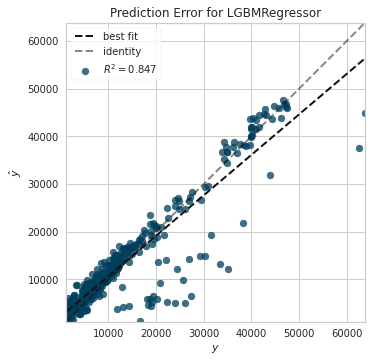

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [51]:
plot_model(tuned_lgbm, plot='error')

#### LGBM -- Residuals

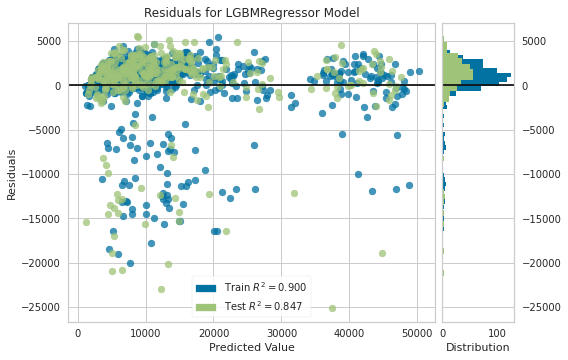

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [52]:
plot_model(tuned_lgbm, plot='residuals')

#### LGBM -- Feature Importance

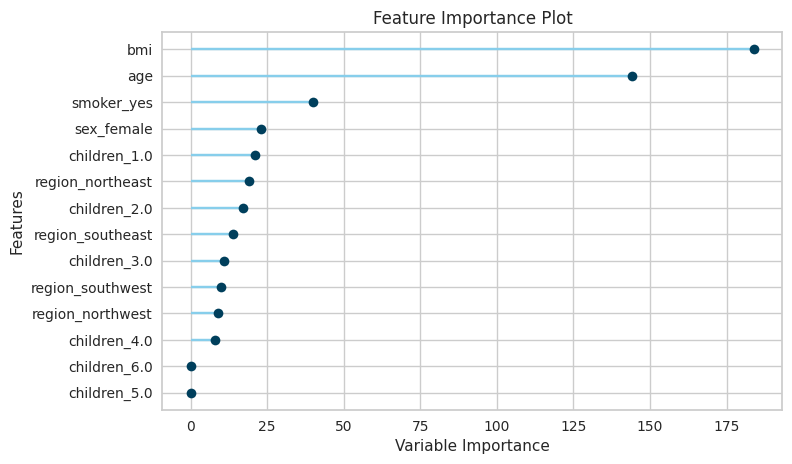

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [53]:
plot_model(tuned_lgbm, plot='feature_all')

##### LGBM -- General View

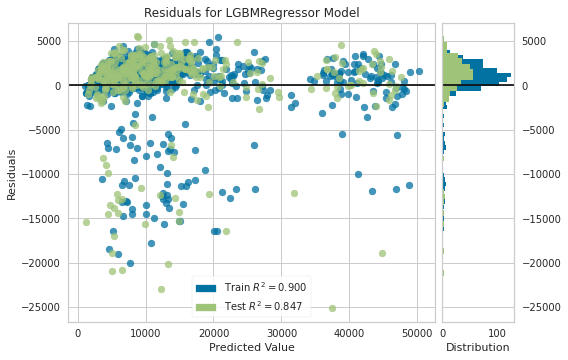

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [54]:
plot_model(tuned_lgbm)

## Choosing the best model

The cross-validation results showed us that the best model with *tuning* was the random forest. So let's proceed with this algorithm.

### Making predictions

Now we can use the random forest to make predictions on the test set separated by Pycaret.

In [55]:
predict_model(tuned_rf)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0002,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=140, n_jobs=-1, oob_score=False,
                      random_state=12, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,2469.6916,2.110909e+07,4594.4629,0.862,0.4334,0.304


,age,bmi,sex_female,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,children_1.0,children_2.0,children_3.0,children_4.0,children_5.0,children_6.0,charges,Label
0,-0.949618,0.033441,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3877.304199,4888.187820
1,-0.242715,0.614414,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5584.305664,7324.756685
2,-1.161690,-0.540995,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2789.057373,5296.182852
3,0.181427,0.902857,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7443.643066,8083.510288
4,1.595235,0.374997,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,15612.193359,15770.330310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,0.110737,-0.385742,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7153.553711,7457.003561
357,-0.242715,-0.122629,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4889.036621,5439.848263
358,0.252118,-0.648855,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,22478.599609,22939.364336
359,-0.737547,-0.168388,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,20277.806641,6258.591674


### Finalizing the Model and predicting on new data

Now, let's finalize the model and apply it to the separate test suite at the beginning of the project to check its performance

In [56]:
final_rf = finalize_model(tuned_rf)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0002,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=140, n_jobs=-1, oob_score=False,
                      random_state=12, verbose=0, warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0002,
                      min_impurity_split=None, min_samples_leaf=5,
               

In [57]:
new_predictions = predict_model(final_rf, data=test)
new_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0002,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=140, n_jobs=-1, oob_score=False,
                      random_state=12, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,2581.1717,2.219787e+07,4711.4612,0.8578,0.4019,0.2882


,age,sex,bmi,children,smoker,region,charges,Label
0,19,male,24.60,1,no,southwest,1837.23700,3196.359424
1,18,male,34.10,0,no,southeast,1137.01100,2792.766177
2,22,male,35.60,0,yes,southwest,35585.57600,37782.030714
3,38,male,37.05,1,no,northeast,6079.67150,8213.125892
4,55,male,37.30,0,no,southwest,20630.28351,11584.332770


In summary, the model performance pratically didn't change when applied to new data.

## Conclusions

The goal of this project was to explore the possibilities and performance of the recent technique of auto machine learning. Using it, we were able to spend less time in the process of building machine learning models, and instead we focused on explore the problem and drawing insights from the available data. From these insights, we identified the main transformations needed to be applied to the data set, and were able to test the performance of several machine learning algoriths, choosing the ones with the best performance. 

We saw how auto machine learning can optimize a data scientist's time and make him more concerned with tasks that are more focused on the specific problem he is trying to solve and that cannot be automated.